<a href="https://colab.research.google.com/github/shreyakapoor08/ML-Practice/blob/master/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU 
from keras.models import Sequential, Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
(X_Train,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_Train.shape)

(60000, 28, 28)


In [4]:
# Normalize the dataset
#GANS ke case mai 0,1 se zyada better -1 se 1 ki normalization hoti hai, 0 mean and unit variance
#output layer ke liye tanh activation use karenge
#hidden layers ke liye LeakyReLU
X_Train = (X_Train.astype('float32')-127.5)/127.5 #0 se 255 ki jagah -127.5 to 127.5
print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [5]:
X_Train = X_Train.reshape(-1,28*28) #flatten the data
print(X_Train.shape)

(60000, 784)


In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) #ek epoch maii kitne batch pass hoyenge
HALF_BATCH_SIZE = 128
NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [7]:
#Generator, it will be a sequential model
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,))) #input ka shape batana padta hai for the first layer
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

#compile
generator.compile(loss='binary_crossentropy',optimizer=adam)

generator.summary()

#none means number of examples



W0717 17:06:58.768789 140628732123008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 17:06:58.773076 140628732123008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 17:06:58.775473 140628732123008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 17:06:58.828531 140628732123008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 17:06:58.835415 140628732123008 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [8]:
#discriminator- it will also be a sequential model
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [9]:
#now we will make a hybrid model which will connect our discriminator and generator
#combined model (generator + discriminator) -> functional API
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,)) #input layer will act like a placeholder jb hum data pass karenge toh vo inout mai jayega
generator_output = generator(gan_input)

#ab yeh output discriminator ke through bhejenge
gan_output = discriminator(generator_output)

#create a model where input goes into gan input and output goes into ganoutput
model = Model(input=gan_input,output=gan_output)

#now we will compile it
model.compile(loss='binary_crossentropy',optimizer=adam) #discriminator obj is trainable true, 

model.summary()





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [0]:
def showImgs(epoch):
  noise = np.random.normal(0,1,size=(100,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generator_imgs = generated_imgs.reshape(-1,28,28)
  
  #Display the images
  plt.figure(figsize=(10,10))
  for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i].reshape((28,28)),cmap='gray',interpolation='nearest')
    plt.axis("off")
  plt.tight_layout()
  plt.show()
  plt.savefig("./images/gan_output_{0}.png".format(epoch+1))

W0717 17:07:01.042930 140628732123008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D Loss 151.2436 G loss 220.8914 


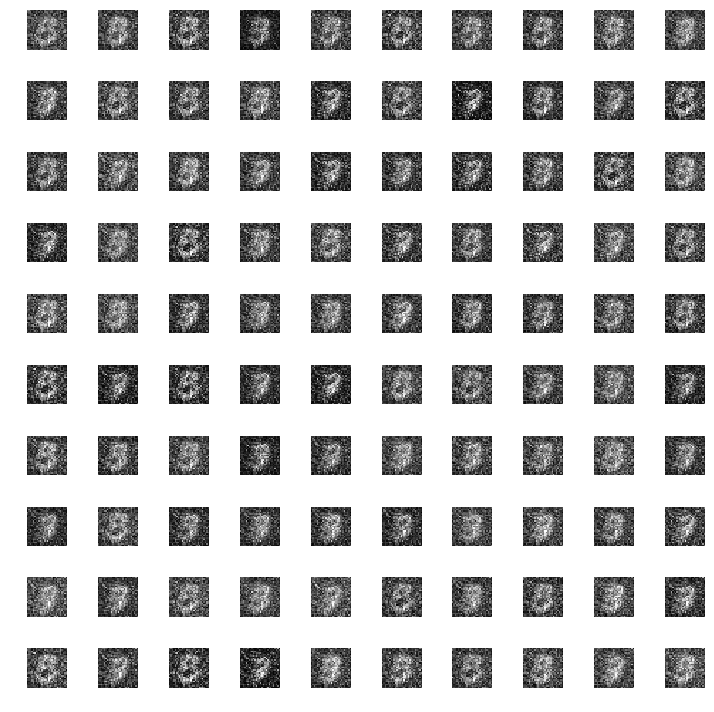

Epoch 2 D Loss 150.9070 G loss 240.1375 
Epoch 3 D Loss 150.3689 G loss 255.6121 
Epoch 4 D Loss 145.5721 G loss 273.2172 
Epoch 5 D Loss 140.6443 G loss 291.6362 
Epoch 6 D Loss 135.7053 G loss 300.7584 


<Figure size 432x288 with 0 Axes>

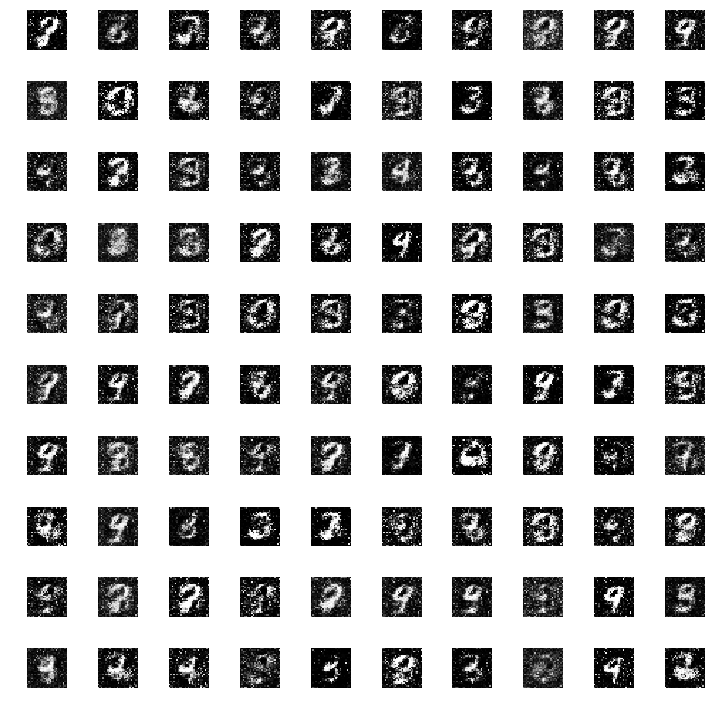

Epoch 7 D Loss 132.4834 G loss 316.0375 
Epoch 8 D Loss 132.3183 G loss 309.1555 
Epoch 9 D Loss 138.1267 G loss 284.9491 
Epoch 10 D Loss 141.6527 G loss 278.3030 
Epoch 11 D Loss 147.9064 G loss 257.1024 


<Figure size 432x288 with 0 Axes>

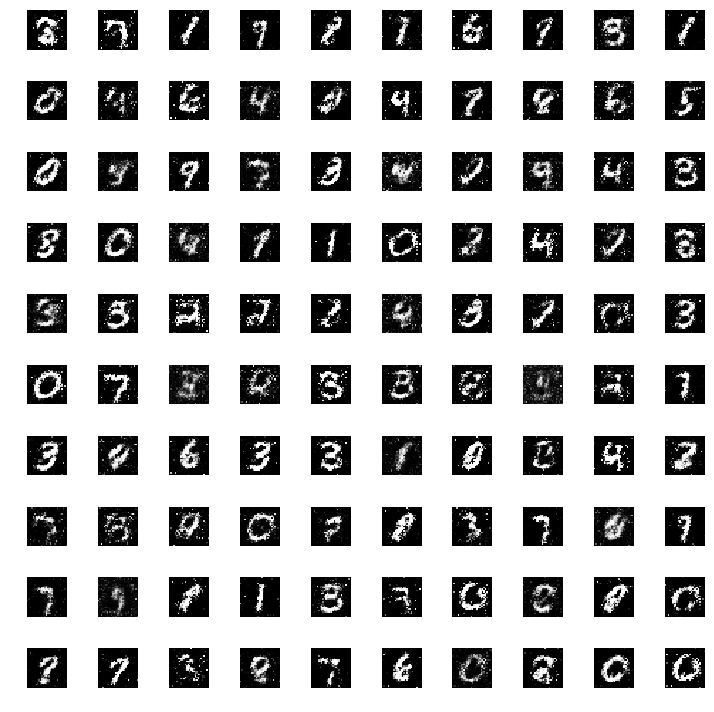

Epoch 12 D Loss 148.5992 G loss 247.8477 
Epoch 13 D Loss 149.4583 G loss 244.3667 
Epoch 14 D Loss 149.5821 G loss 242.7569 
Epoch 15 D Loss 149.4943 G loss 247.3985 
Epoch 16 D Loss 150.3814 G loss 243.7833 


<Figure size 432x288 with 0 Axes>

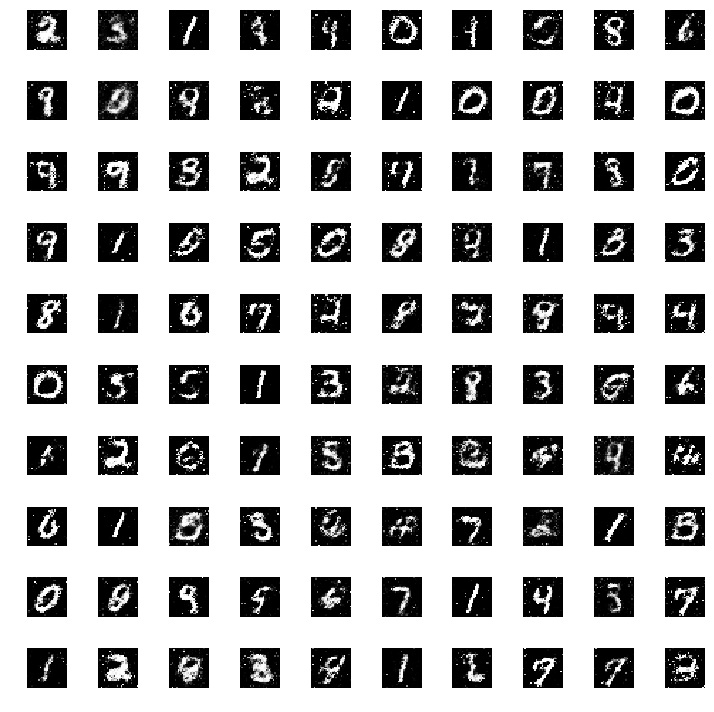

Epoch 17 D Loss 150.5677 G loss 241.5874 
Epoch 18 D Loss 150.5595 G loss 241.7542 
Epoch 19 D Loss 149.7671 G loss 244.4211 
Epoch 20 D Loss 150.5704 G loss 241.3786 
Epoch 21 D Loss 151.1746 G loss 241.7797 


<Figure size 432x288 with 0 Axes>

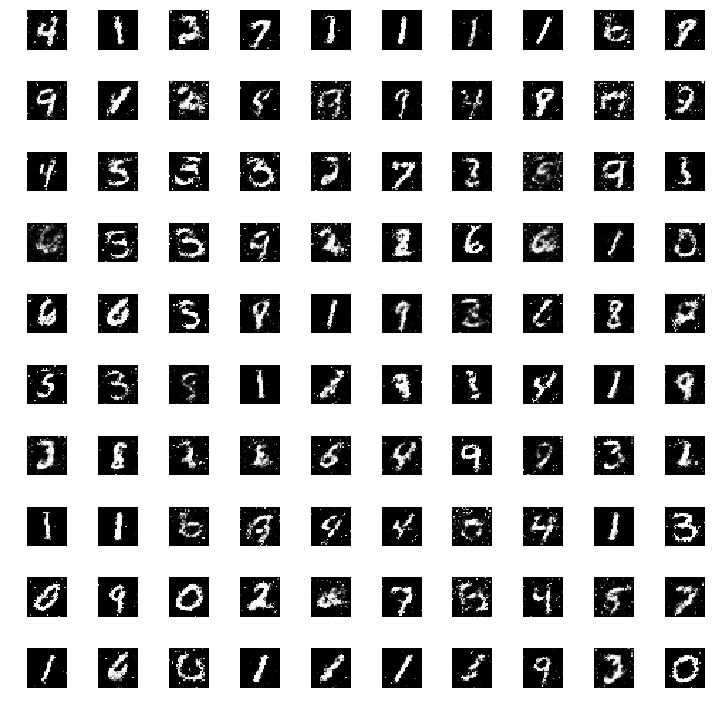

Epoch 22 D Loss 151.9425 G loss 238.5044 
Epoch 23 D Loss 152.0105 G loss 239.0096 
Epoch 24 D Loss 151.2461 G loss 241.1284 
Epoch 25 D Loss 152.1041 G loss 240.8824 
Epoch 26 D Loss 152.3989 G loss 239.8493 


<Figure size 432x288 with 0 Axes>

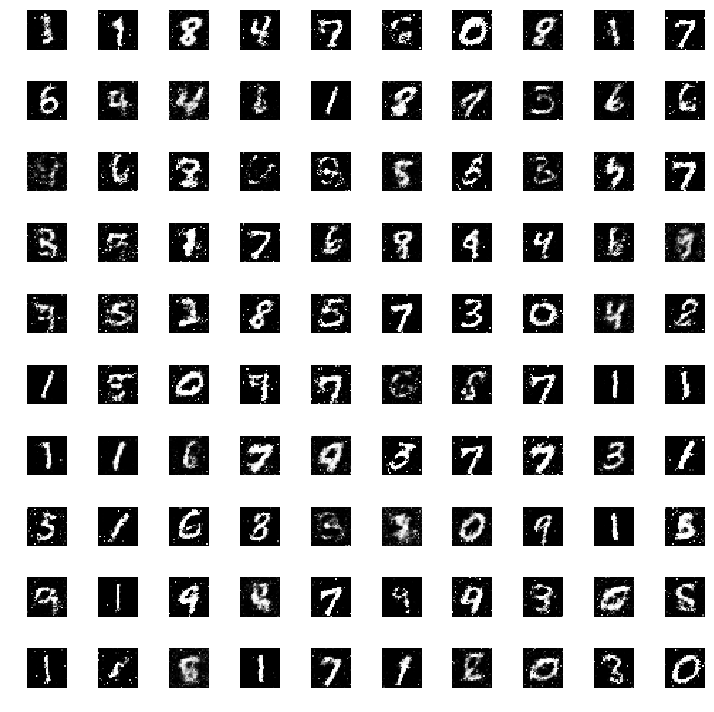

Epoch 27 D Loss 152.9876 G loss 238.0199 
Epoch 28 D Loss 152.6605 G loss 238.3184 
Epoch 29 D Loss 152.7332 G loss 238.3243 
Epoch 30 D Loss 153.3234 G loss 236.5642 
Epoch 31 D Loss 153.4791 G loss 235.9844 


<Figure size 432x288 with 0 Axes>

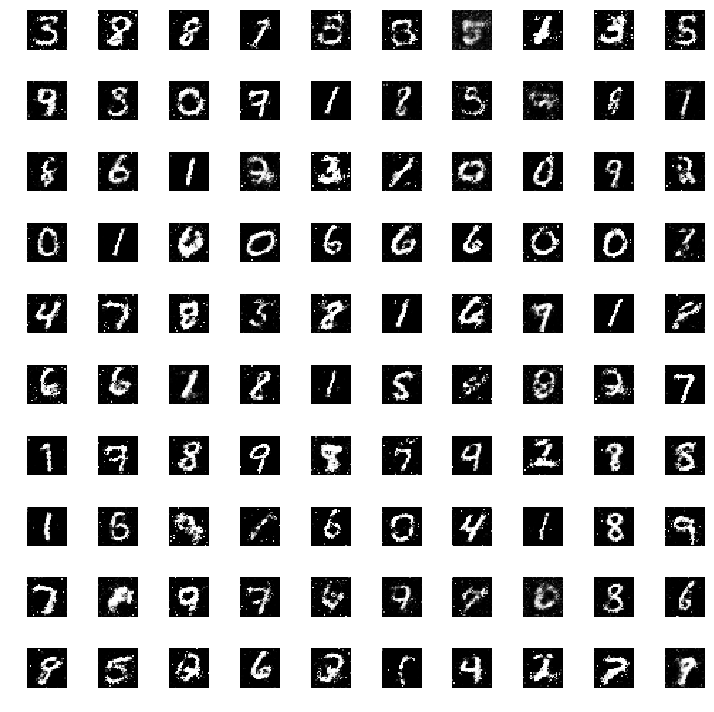

Epoch 32 D Loss 153.9727 G loss 236.2815 
Epoch 33 D Loss 154.0054 G loss 234.6870 
Epoch 34 D Loss 154.4876 G loss 235.4318 
Epoch 35 D Loss 154.1977 G loss 234.6103 
Epoch 36 D Loss 154.5207 G loss 235.2128 


<Figure size 432x288 with 0 Axes>

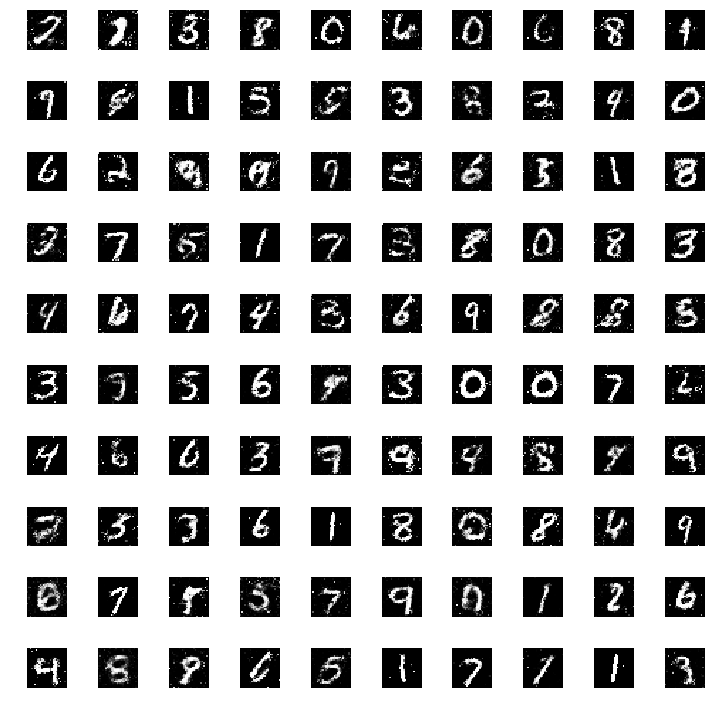

Epoch 37 D Loss 154.1710 G loss 233.2093 
Epoch 38 D Loss 154.7881 G loss 234.1253 
Epoch 39 D Loss 154.7642 G loss 233.7058 
Epoch 40 D Loss 154.6584 G loss 233.3511 
Epoch 41 D Loss 154.6088 G loss 234.2211 


<Figure size 432x288 with 0 Axes>

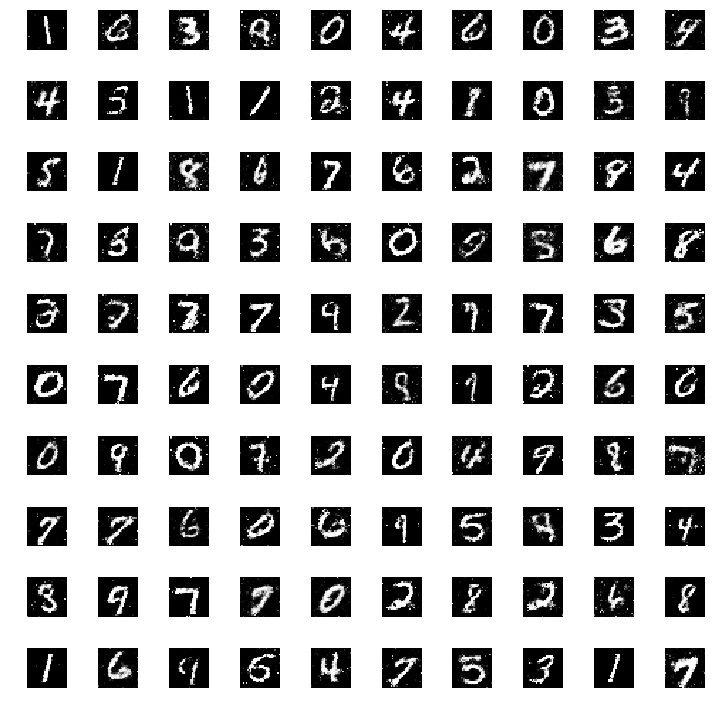

Epoch 42 D Loss 154.5376 G loss 231.8428 
Epoch 43 D Loss 154.5854 G loss 233.0209 
Epoch 44 D Loss 154.4066 G loss 234.6595 
Epoch 45 D Loss 154.6477 G loss 234.0634 
Epoch 46 D Loss 154.9908 G loss 232.5931 


<Figure size 432x288 with 0 Axes>

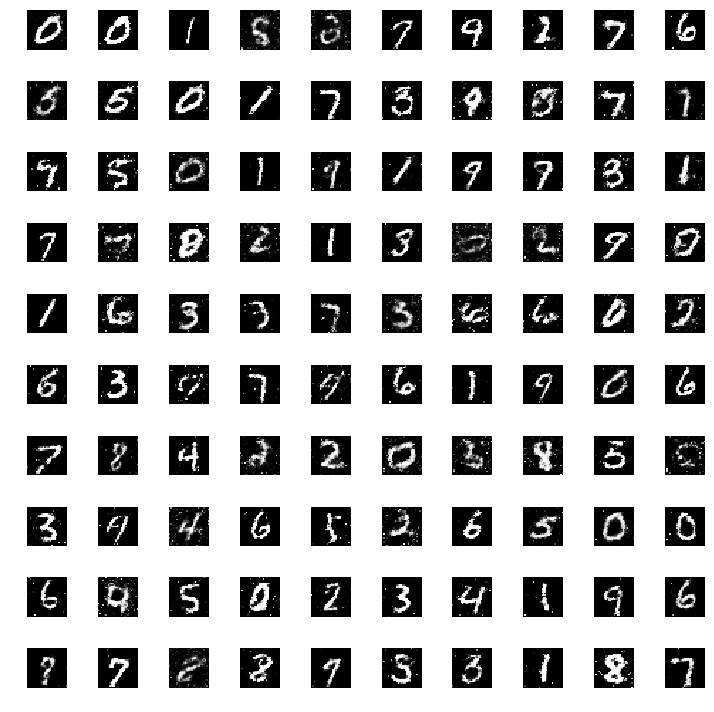

Epoch 47 D Loss 154.8599 G loss 232.7631 
Epoch 48 D Loss 155.4840 G loss 232.8288 
Epoch 49 D Loss 154.5826 G loss 232.7515 
Epoch 50 D Loss 154.9519 G loss 234.1968 
Epoch 51 D Loss 154.7229 G loss 233.4769 


<Figure size 432x288 with 0 Axes>

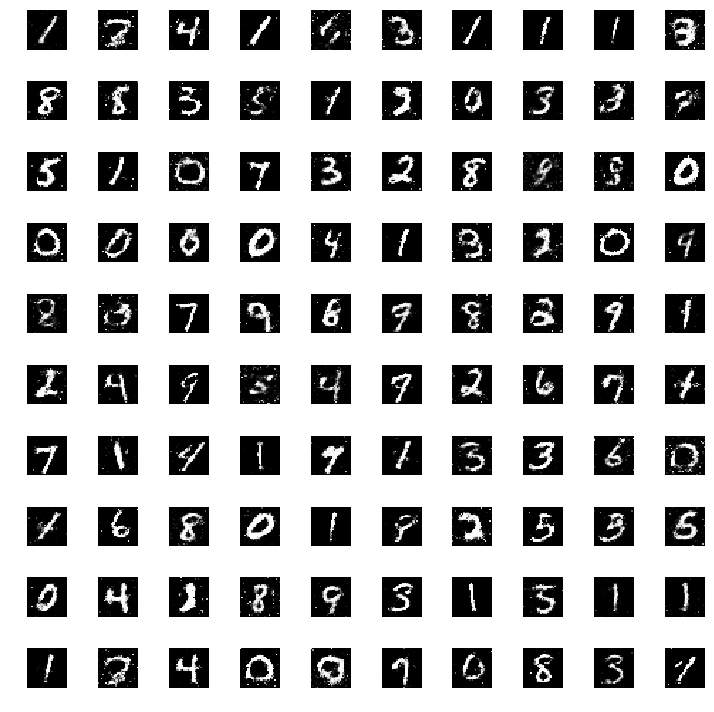

Epoch 52 D Loss 155.2897 G loss 232.6848 
Epoch 53 D Loss 155.1172 G loss 231.6735 
Epoch 54 D Loss 155.1395 G loss 232.5145 
Epoch 55 D Loss 155.0270 G loss 232.5966 
Epoch 56 D Loss 154.5009 G loss 233.1461 


<Figure size 432x288 with 0 Axes>

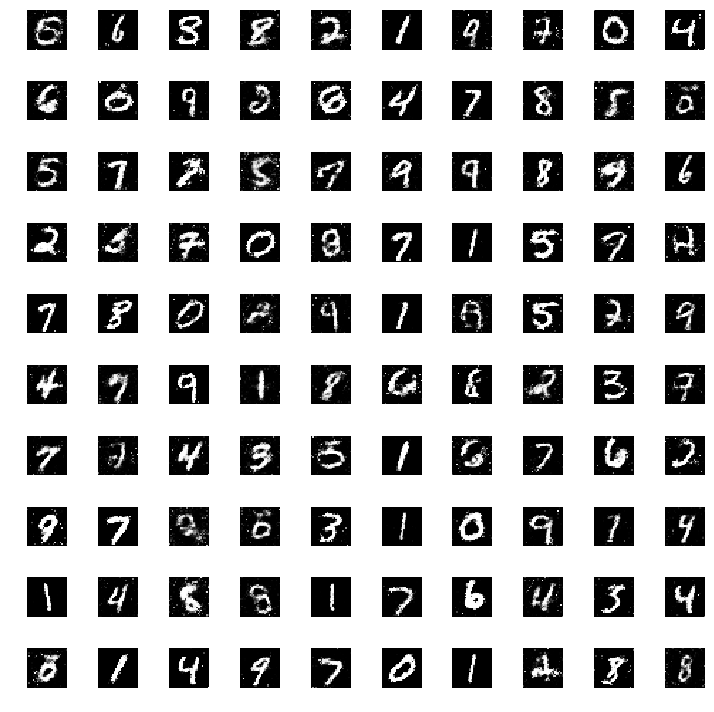

Epoch 57 D Loss 155.2140 G loss 232.5003 
Epoch 58 D Loss 155.3065 G loss 233.0402 
Epoch 59 D Loss 155.3084 G loss 233.1315 
Epoch 60 D Loss 155.2643 G loss 232.1145 


<Figure size 432x288 with 0 Axes>

In [11]:
d_losses = []
g_losses = []

#training loop
for epoch in range(EPOCHS):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  
  #step 1
  #mini batch
  for step in range(NO_OF_BATCHES):
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE) #0,60000,128
    real_imgs = X_Train[idx] #inn indeces pr jo images thi vo X_Train mai agyi
    
    #generate fake images assuming generator is frozen
    noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs = generator.predict(noise)
    
    #labels
    real_y = np.ones((HALF_BATCH_SIZE,1))*0.9
    fake_y = np.zeros((HALF_BATCH_SIZE,1))
    
    #Train on real and fake images
    d_real_loss = discriminator.train_on_batch(real_imgs,real_y)
    d_fake_loss = discriminator.train_on_batch(fake_imgs,fake_y)
    
    d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
    epoch_d_loss += d_loss
    
    #step 2-- train generator
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    real_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise,real_y)
    epoch_g_loss += g_loss
    
  print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
  if(epoch%5)==0:
    generator.save("model/gen_{0}.h5".format(epoch))
    showImgs(epoch)
    
    
    
    
    
    
    
    

In [12]:

# !ls -- check directory in folder
!mkdir images
!mkdir model


mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘model’: File exists


In [13]:
!ls

images	images.zip  model  sample_data


In [14]:
!zip -r images.zip /content/images

updating: content/images/ (stored 0%)
  adding: content/images/gan_output_36.png (deflated 83%)
  adding: content/images/gan_output_6.png (deflated 83%)
  adding: content/images/gan_output_26.png (deflated 83%)
  adding: content/images/gan_output_1.png (deflated 83%)
  adding: content/images/gan_output_21.png (deflated 83%)
  adding: content/images/gan_output_41.png (deflated 83%)
  adding: content/images/gan_output_51.png (deflated 83%)
  adding: content/images/gan_output_11.png (deflated 83%)
  adding: content/images/gan_output_31.png (deflated 83%)
  adding: content/images/gan_output_16.png (deflated 83%)
  adding: content/images/gan_output_46.png (deflated 83%)
  adding: content/images/gan_output_56.png (deflated 83%)


In [15]:
!ls

images	images.zip  model  sample_data


In [0]:
from google.colab import files
files.download('images.zip')

In [17]:
!ls

images	images.zip  model  sample_data
